# <u>**The Galactic Neighborhood**</u>
## **The Fate of the Milky Way and Andromeda Galaxies**
#### Written by Ekta Patel, U. Arizona; Simulation by Gurtina Besla, U. Arizona

<br>
In this notebook, we will explore the future fate of the Milky Way, Andromeda (M31), and the Triangulum (M33) galaxy. We will do so by analyzing N-body simulations of these galaxies where their current space motion is used to model their future orbital trajectories. 

Please feel free to ask questions as we work through this activity together!

## How to use this notebook (adapted from Gautham Narayan)

The webpage you are in is actually an app - much like you'd run on your cellphone. This app consists of cells. 

Each "input" cell (something with an "In" to the left) contains code, or instructions to make the computer do something.

You can <u>**modify the code by typing into the cell when specified.**</u>

You <u>**execute a cell with Shift+Enter**</u> on the keyboard - this makes the computer execute your instructions. That's what this app does! 

You can try it for yourself at https://try.jupyter.org/ outside of the cafe!

In [2]:
# Ignore this stuff - it is to setup the plotting envrionment in your browser
# Just hit Shift + Enter here, and move on
#%matplotlib notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np
from CenterOfMass import CenterOfMass
import astropy.units as u
from astropy.constants import G
from matplotlib.colors import LogNorm

# <u>Activity 1: Simulating the Motion of Galaxies </u>

As we learned earlier, snapshots of the sky taken using telescopes don't always provide enough information for us to understand how galaxies have been moving relative to one another in the past. Therefore, we have to use something called <i> proper motion </i> to get a sense of how a galaxy is moving. <font color='blue'> Proper motion is the measure of the amount a galaxy moves across the sky relative to some distant background object over time.</font> The accuracy of these types of measurements for galaxies like Andromeda are about 10-30 micro-arcseconds per year, which is equivalent to roughly the rate of human hair growth at the distance of the Moon! In other words, these are very tiny movements!

## Part 1: Let's explore the orbits of some of the satellite galaxies orbiting around the MW. The following plots show predicted orbits for MW satellites during the last 6 billion years. 1 kiloparsec (kpc) is about 200 million times the distance between the Earth and the Sun!
<br>
<figure>
<center>
<img src="classical_sats_orbits_withLMC.png", width=500>
<figcaption> The orbits of 10 classical MW satellites backwards in time. The y-axis shows your position relative to the center of the Galaxy and the x-axis shows you time in Gigayears (a billion years).
<b>Image Credit:</b> Ekta Patel </figcaption>
</center>
</figure>

<br>
<figure>
<center>
<img src="classical_sats_3D_orbits_faceon_new_zoom.png", width=700>
<figcaption> The locations of 10 classical MW satellites today (dots) and their past orbits (lines) from a different perspective. 
<b>Image Credit:</b> Ekta Patel </figcaption>
</center>
</figure>


## Part 2: Let's move to the Andromeda galaxy -- the closest galaxy to the MW that has approximately the same mass. Andromeda is currently moving towards the Milky Way at a rate of 110 km/s. That's 246,063 miles/hr!
<br>
<figure>
<center>
<img src="M31.jpg", width=500>
<figcaption>The Andromeda Galaxy. 
<b>Image Credit:</b> Adam Evans</figcaption>
</center>
</figure>

<br>
<figure>
<center>
<img src="pandas.jpg", width=500>
<figcaption>Andromeda also has many satellite galaxies. Their proper motions have not been measured yet, so we cannot predict their past orbital histories. The Andromeda Galaxy observed by the PAndAS survey. 
<b>Image Credit:</b> Pan-Andromeda Archaeological Survey.</figcaption>
</center>
</figure>

# <u>Activity 2: The future orbits of the Milky Way and Andromeda </u>

Let's start analyzing the simulation of the future MW and Andromeda collision. The galaxies are represented by mass particles. The MW is composed of about 67,500 particles in this simulation. M31 is composed of about 94,500 particles and M33 is represented by 14,300 particles. 

### <b> <font color='blue'> Q: Why do you think the galaxies are represented with different numbers of particles? </font> </b>


In [3]:
# Just hit Shift+Return for this cell. It is reading in the data files.

# headers:  t, x, y, z, vx, vy, vz
MWOrbit = np.genfromtxt('Orbit_MW.txt',dtype=None,names=True) 
M31Orbit = np.genfromtxt('Orbit_M31.txt',dtype=None,names=True) 
M33Orbit = np.genfromtxt('Orbit_M33.txt',dtype=None,names=True)


# Determine the magnitude of the 
# relative position and velocities 

# of MW and M31
M31MWR = np.sqrt((MWOrbit['x']-M31Orbit['x'])**2 + (MWOrbit['y']-M31Orbit['y'])**2 
                 +(MWOrbit['z']-M31Orbit['z'])**2) 
M31MWV = np.sqrt((MWOrbit['vx']-M31Orbit['vx'])**2 + (MWOrbit['vy']-M31Orbit['vy'])**2 
                 +(MWOrbit['vz']-M31Orbit['vz'])**2) 

# of M33 and M31
M33M31R = np.sqrt((M31Orbit['x']-M33Orbit['x'])**2 + (M31Orbit['y']-M33Orbit['y'])**2 
                 +(M31Orbit['z']-M33Orbit['z'])**2) 
M33M31V = np.sqrt((M31Orbit['vx']-M33Orbit['vx'])**2 + (M31Orbit['vy']-M33Orbit['vy'])**2 
                 +(M31Orbit['vz']-M33Orbit['vz'])**2)

# of MW and M33
MWM33R = np.sqrt((MWOrbit['x']-M33Orbit['x'])**2 + (MWOrbit['y']-M33Orbit['y'])**2 
                 +(MWOrbit['z']-M33Orbit['z'])**2) 
MWM33V = np.sqrt((MWOrbit['vx']-M33Orbit['vx'])**2 + (MWOrbit['vy']-M33Orbit['vy'])**2 
                 +(MWOrbit['vz']-M33Orbit['vz'])**2)

## Part 1: The orbital trajectories of the MW and Andromeda
The code below plots the particle-averaged orbits of the MW and Andromeda. The plot on the left shows the separation between the galaxies as a function of future time. The plot on the right shows the relative velocity between the two galaxies as a function of time. <b> <font color='red'> Hit Shift+Return in the cell below to make the plots.</font></b>

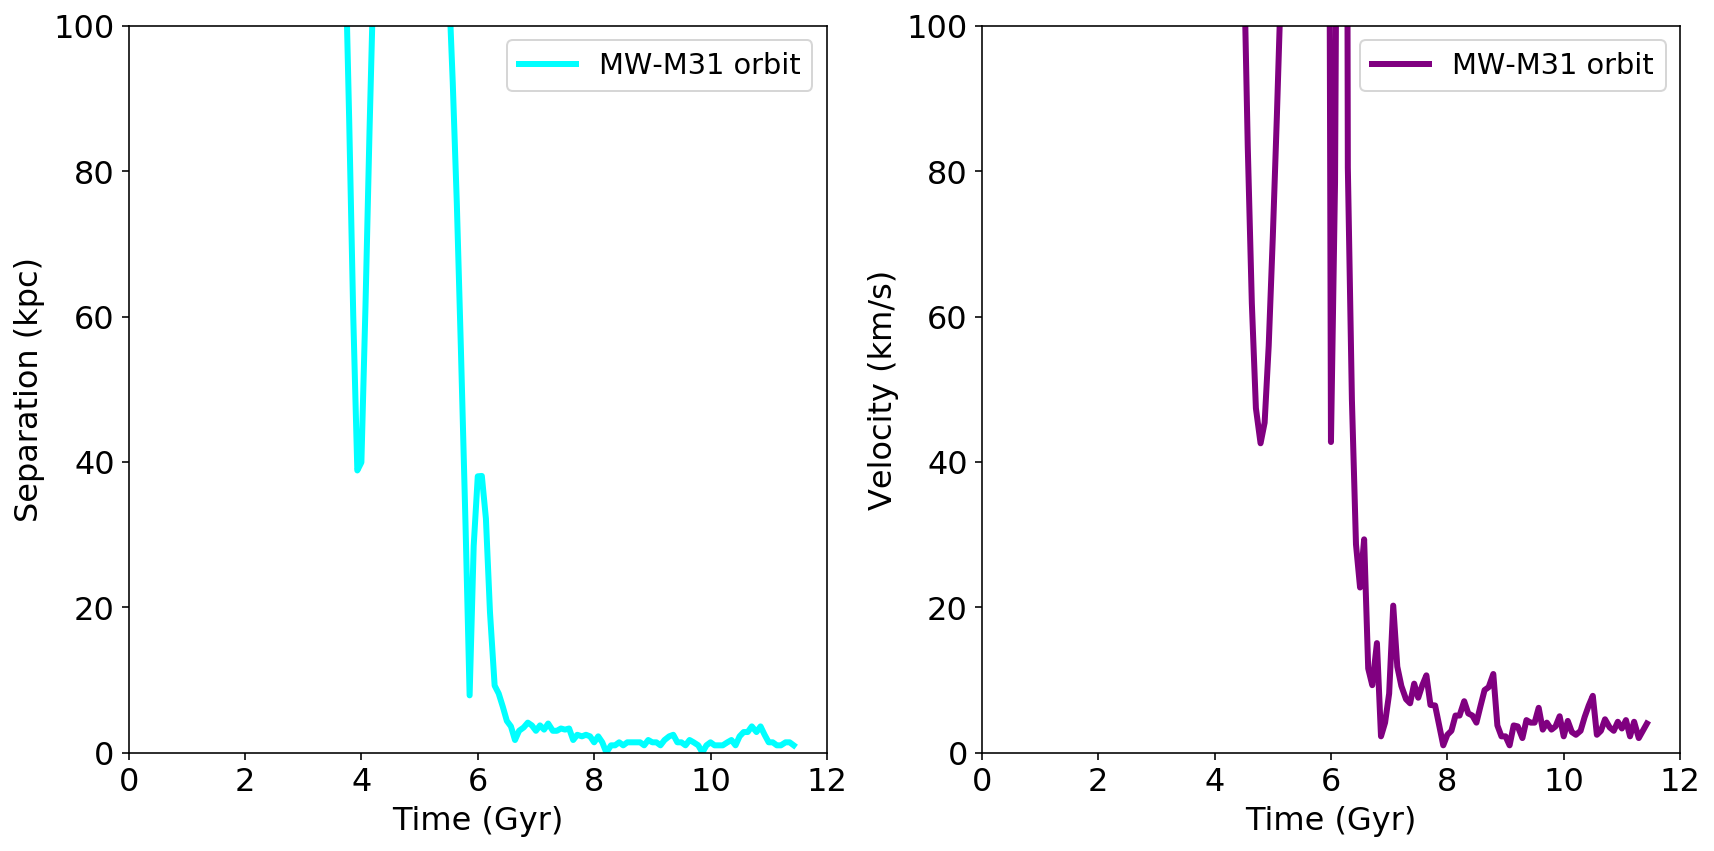

In [4]:
# This sets how many Gyr into the future we can see the orbits for. 0 Gyr = today 
# and 12 Gyr is the maximum.
mintime = 0. ## EDIT HERE!
maxtime = 12. ## EDIT HERE!

# This sets the upper limit on the separation between the galaxies.
max_sep = 100 ## EDIT HERE!

### ignore everything below here ###
plt.figure(figsize=(12,6))
label_size = 16
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Plot 1 - Left 
ax = plt.subplot(121)

plt.plot(MWOrbit['t'], M31MWR, lw=3, color='aqua', label='MW-M31 orbit')

plt.xlabel('Time (Gyr)', fontsize=16)
plt.ylabel('Separation (kpc)', fontsize=16)

ax.set_xlim(mintime, maxtime)
ax.set_ylim(0, max_sep)

plt.legend(loc='upper right',fontsize='x-large')

# Plot 2 - Right
ax2 = plt.subplot(122)

plt.plot(MWOrbit['t'], M31MWV, lw=3, color='purple', label='MW-M31 orbit')

ax2.set_xlim(mintime, maxtime)
ax2.set_ylim(0, max_sep)

plt.xlabel('Time (Gyr)', fontsize=16)
plt.ylabel('Velocity (km/s)', fontsize=16)

plt.legend(loc='upper right',fontsize='x-large')
plt.tight_layout()


### <b> <font color='blue'> Q: When will the MW and Andromeda (M31) first collide? Hint: What do the dips and the peaks in each plot above represent? </font> </b> 

### <b> <font color='blue'> Q: How many times will the two galaxies interact before they completely merge? When will that happen?</font> </b> 

<b> <font color ='red'>You may need to zoom in on the plots above by changing the quantities labeled "mintime", "maxtime" and "max_sep" at the beginning of the cell above. </font></b>

## Part 2: What will the galaxies look like when they first collide? 
<font color='red'><b> Hit Shift+Return </font></b> to see what the galaxies look like at the start of the simulation (snap=0), which corresponds to today. 

Text(0.45,0.01,'time = 10.0 Gyr')

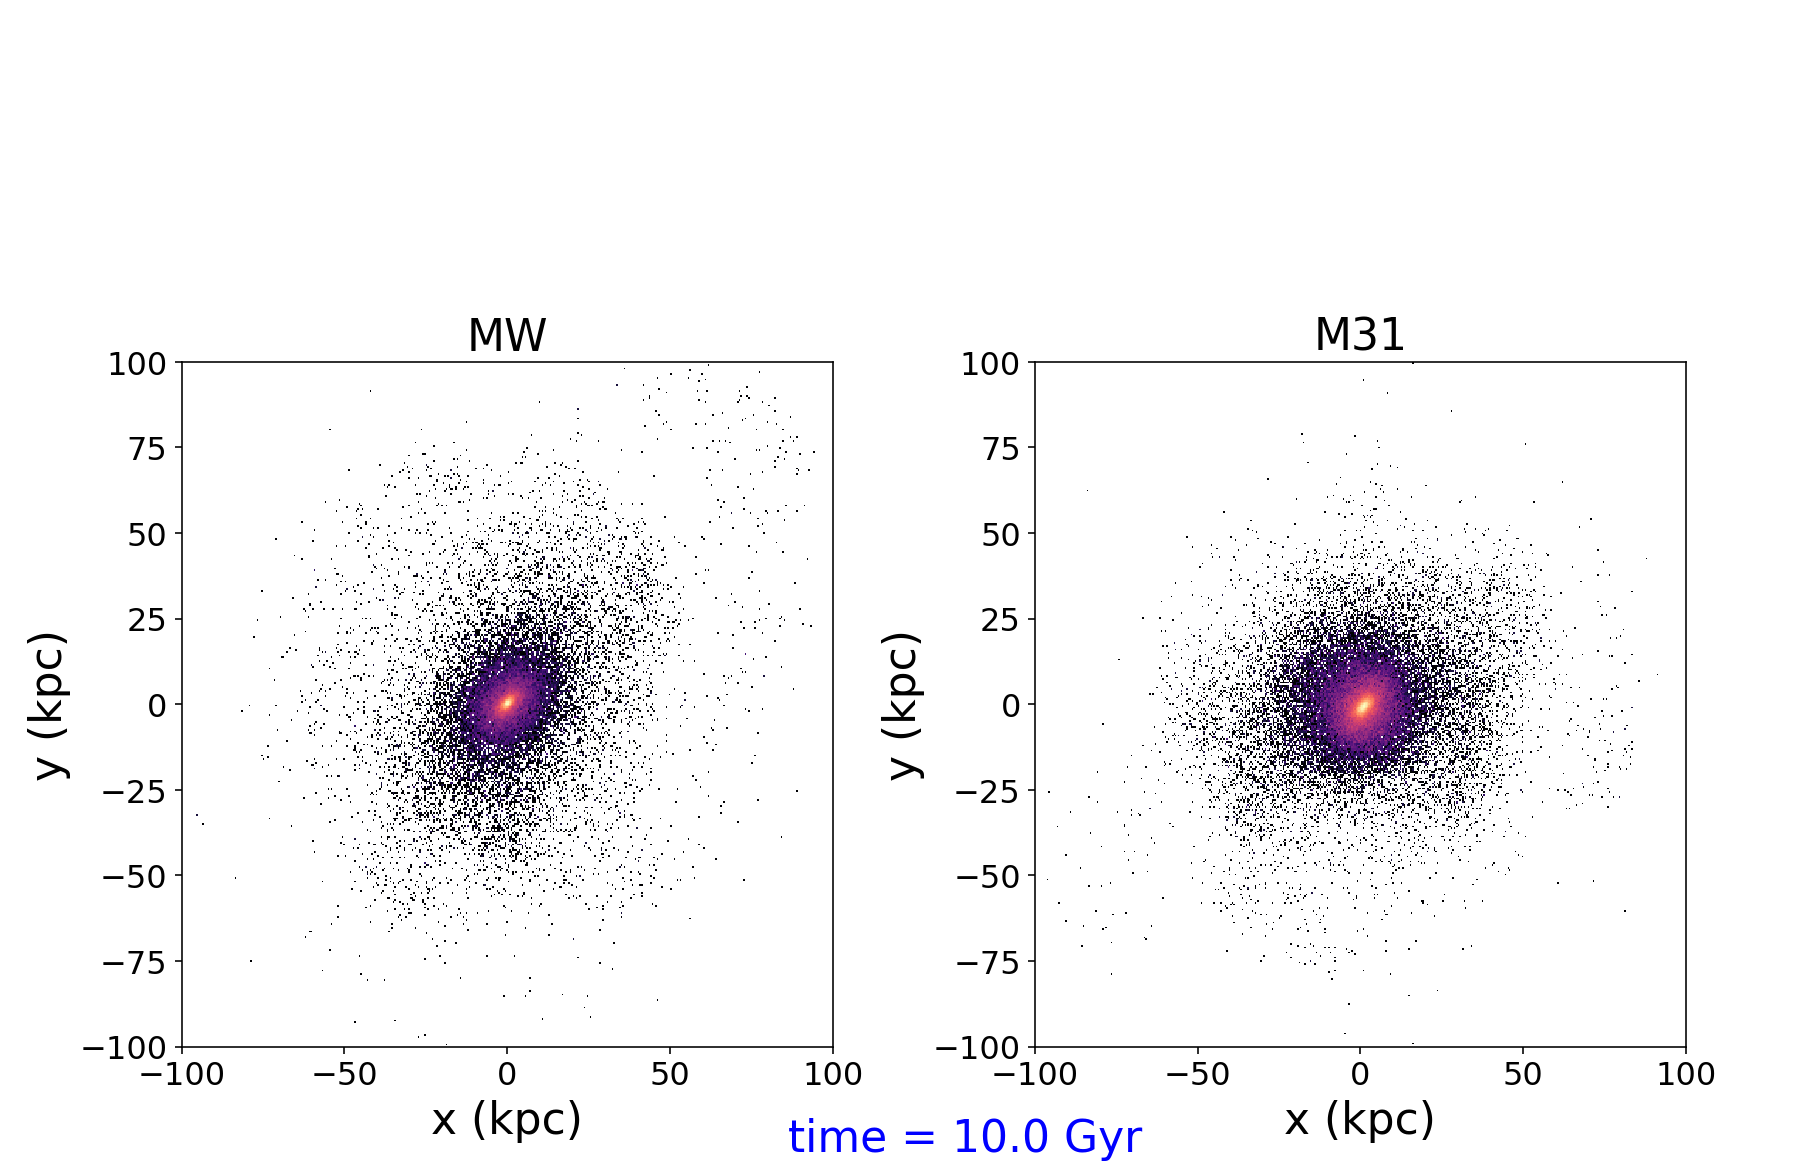

In [7]:
snap = 700# EDIT HERE! Change from 0-800 in whole, even numbers.

### ignore everything below here ### 
snap = '000' + str(int(snap))                       
snap = snap[-3:]   

## MW
COMD = CenterOfMass("Sims/MW_VLowRes/MW_%s.txt"%snap,2)
COMP = COMD.COM_P(0.1, 4.0)
COMV = COMD.COM_V(COMP[0],COMP[1],COMP[2])

# Determine positions and velocities of disk particles relative to COM motion
xD = COMD.x - float(COMP[0]/u.kpc)
yD = COMD.y - float(COMP[1]/u.kpc)
zD = COMD.z - float(COMP[2]/u.kpc)

## M31
COMD2 = CenterOfMass("Sims/M31_VLowRes/M31_%s.txt"%snap,2)
COMP2 = COMD2.COM_P(0.1, 4.0)
COMV2 = COMD2.COM_V(COMP2[0],COMP2[1],COMP2[2])

# Determine positions and velocities of disk particles relative to COM motion
xD2 = COMD2.x - float(COMP2[0]/u.kpc)
yD2 = COMD2.y - float(COMP2[1]/u.kpc)
zD2 = COMD2.z - float(COMP2[2]/u.kpc)


## PLOT 
fig = plt.figure(figsize=(12,6))

ax = plt.subplot(121)

ax.hist2d(xD, yD, bins=600, norm=LogNorm(), cmap='magma')

# Add axis labels
ax.set_xlabel('x (kpc)', fontsize=22)
ax.set_ylabel('y (kpc)', fontsize=22)

box = 100.
#set axis limits
ax.set_ylim(-box,box)
ax.set_xlim(-box,box)
plt.title('MW', fontsize=22)

ax2 = plt.subplot(122)
ax2.hist2d(xD2, yD2, bins=600, norm=LogNorm(), cmap='magma')
#plt.colorbar()

# Add axis labels
ax2.set_xlabel('x (kpc)', fontsize=22)
ax2.set_ylabel('y (kpc)', fontsize=22)

#set axis limits
ax2.set_ylim(-box,box)
ax2.set_xlim(-box,box)
plt.title('M31',fontsize=22)

plt.tight_layout()
plt.figtext(0.45, 0.01, 'time = %s Gyr'%round(int(snap)*14.287/1000,2), fontsize=22, color='blue')


<font color='red'> <b> Now go to the top of the cell above and edit the line that starts with 'snap =' to see what the galaxies will look like at future points in the orbit. Input any even number between 0 and 800 as a whole number. Each "snap" or "snapshot" corresponds to about 14 million years in the future.</font> </b>

# <u>Activity 3: The Future Evolution of M33 </u>

## Part 1:  What happens to M33 during the MW and Andromeda collision? It started off as a satellite galaxy of Andromeda. 

The following piece of code will plot the trajectories of M33-MW and M33-M31 until 6.5 Gyr into the future. <font color='red'> <b> Hit Shift+Return.</b></font>.  

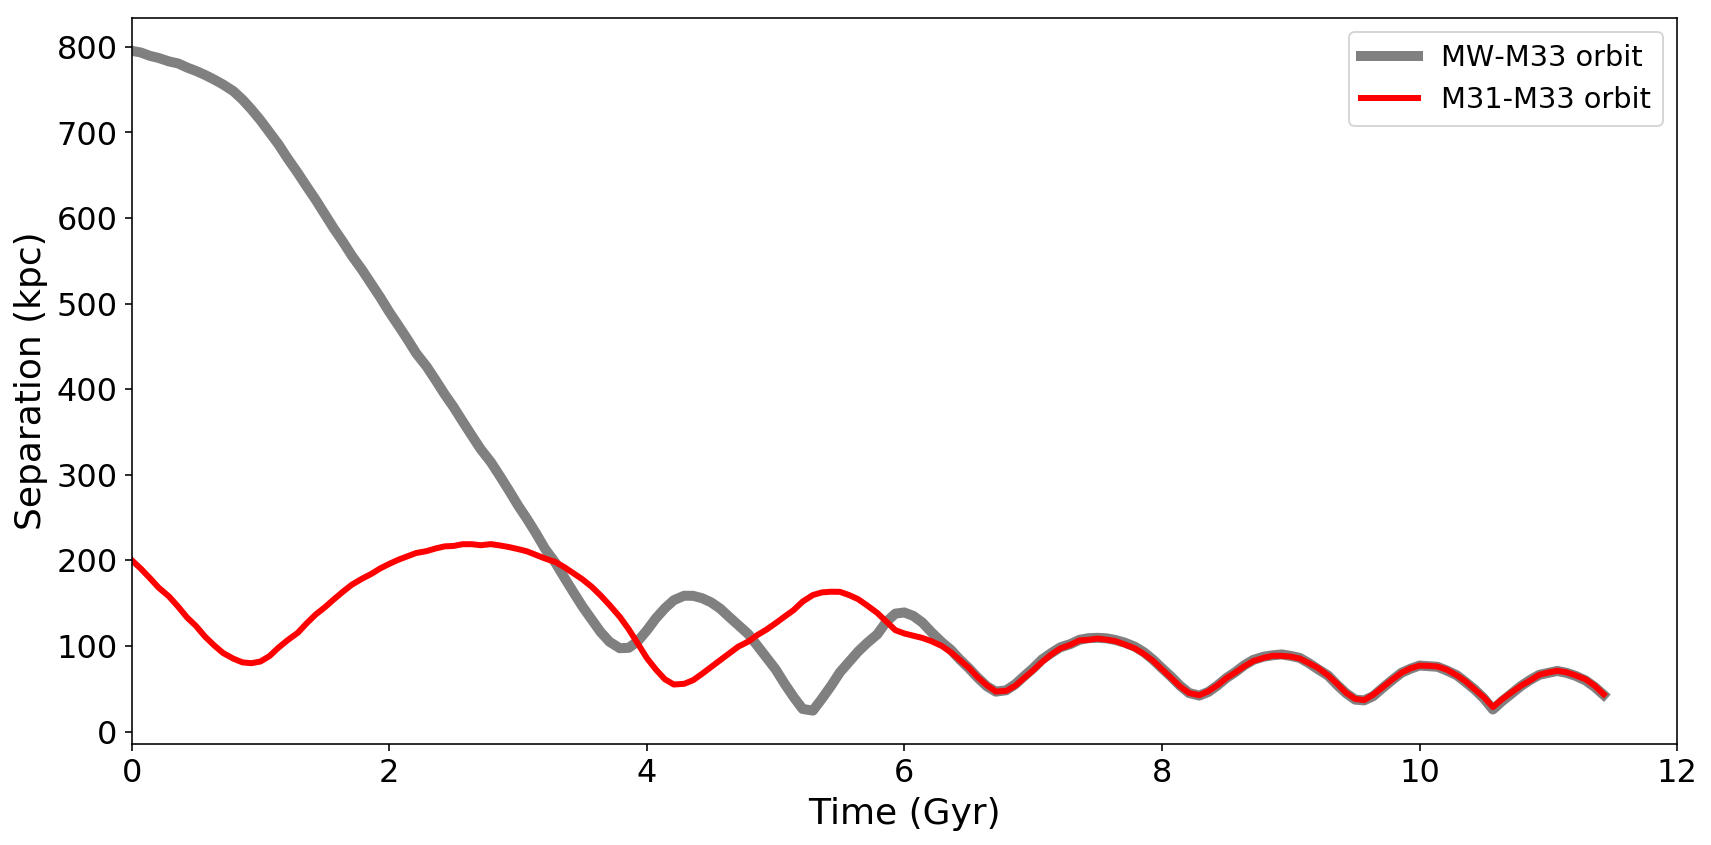

In [8]:
time = 12 ## EDIT HERE!

### ignore everything below this ###
plt.figure(figsize=(12,6))
# Plot 1
ax = plt.subplot(111)
plt.plot(M33Orbit['t'], MWM33R, lw=5, color='grey', label='MW-M33 orbit')
plt.plot(M33Orbit['t'], M33M31R, lw=3, color='red', label='M31-M33 orbit')

plt.xlabel('Time (Gyr)', fontsize=18)
plt.ylabel('Separation (kpc)', fontsize=18)

label_size = 16
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(loc='upper right',fontsize='x-large')
plt.xlim(0, time)
ax.set_rasterized(True)


plt.tight_layout()

### <font color='blue'>Q: Will M33 collide with either the MW, Andromeda, or the merged galaxy? 

<font color='red'> <b> Edit the line that says 'time = ' in the cell above to anything between 0 and 12 to see the future orbit of M33. </font> </b>


## Part 2: What happens to the morphology of M33 over time?

The cell below shows you what M33 looks like at the start of the simulation. <font color='red'> <b>Hit Shift+Return.</b></font>

Text(0,0.5,'y (kpc)')

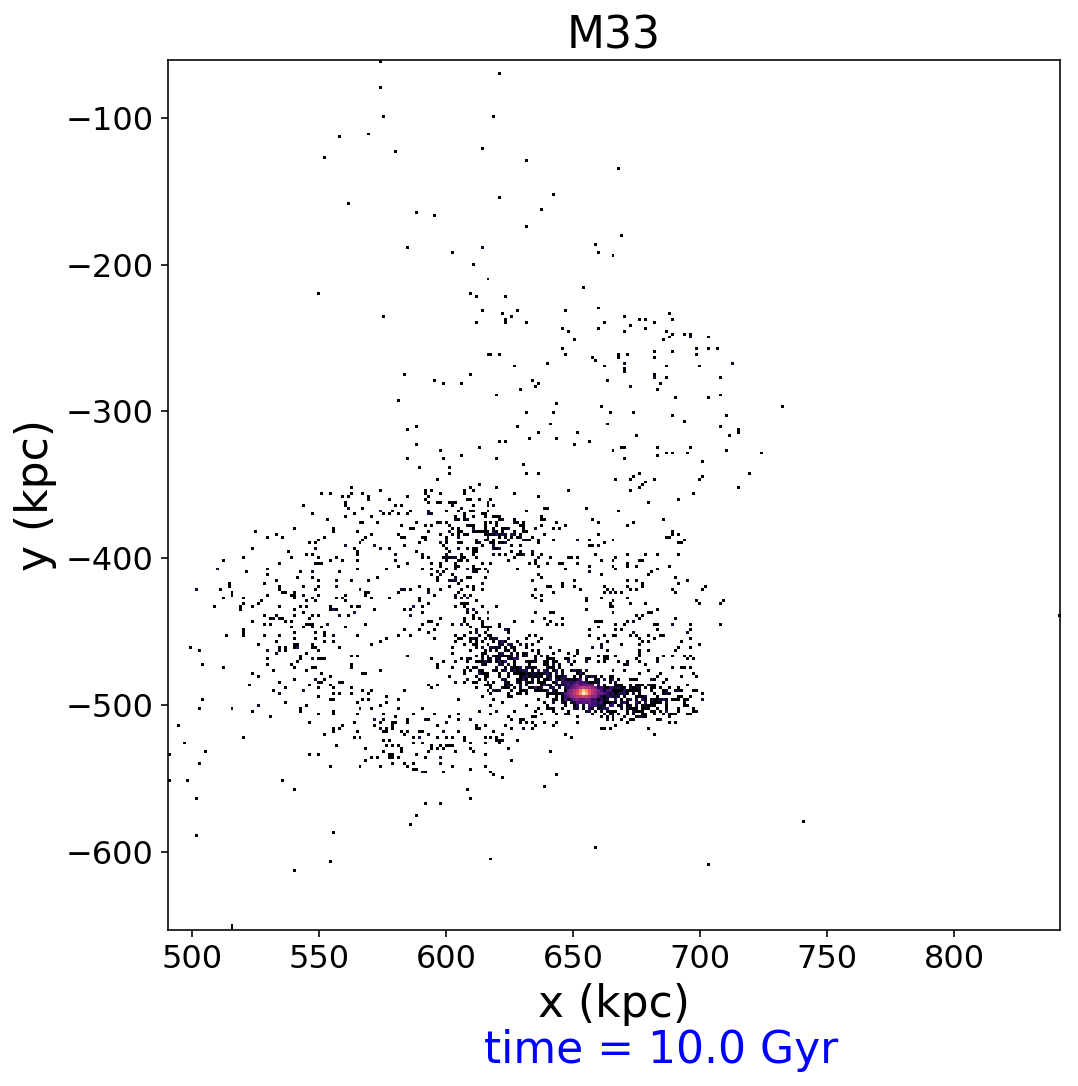

In [13]:
snap = 700## EDIT HERE! Change from 0-800 in whole numbers.
ptype = 2## EDIT HERE! 1 = dark matter particles, 2 = star particles

### ignore everything below here ### 
snap = '000' + str(int(snap))                       
snap = snap[-3:]  

## M33
COMD3 = CenterOfMass("Sims/M33_VLowRes/M33_%s.txt"%snap,ptype)
COMP3 = [-475. * u.kpc, 490. * u.kpc, -415 * u.kpc]#COMD3.COM_P(0.1, 4.0)
COMV3 = COMD3.COM_V(COMP3[0],COMP3[1],COMP3[2])

# Determine positions and velocities of disk particles relative to COM motion
xD3 = COMD3.x - float(COMP3[0]/u.kpc)
yD3 = COMD3.y - float(COMP3[1]/u.kpc)
zD3 = COMD3.z - float(COMP3[2]/u.kpc)

plt.figure(figsize=(8,8))
plt.title('M33', fontsize=22)
plt.figtext(0.4, 0.01, 'time = %s Gyr'%round(int(snap)*14.287/1000,2), fontsize=22, color='blue')

plt.hist2d(xD3, yD3, bins=300, norm=LogNorm(), cmap='magma')

# Add axis labels
plt.xlabel('x (kpc)', fontsize=22)
plt.ylabel('y (kpc)', fontsize=22)



### <font color='blue'>Q: How does M33's morphology change over time?</font>
<br>
<font color='red'> <b> Go to the top of the cell above and edit the line that starts with 'snap =' to see what M33 will look like at future points in the orbit. Input any even number between 0 and 800 and watch the progression as time goes on. </font> </b>
<br>


### <font color='blue'> Q: Do the stars and the dark matter particles have the same shape? What about how far the stars vs. dark matter particles extend in size (hint: how do the limits of the x and y axis change)?</font>
<br>
<font color='red'> <b> Change the line in the cell above that starts with 'ptype =' to 1 or 2. 1 represents the dark matter halo particles and 2 shows the star particles. </font> </b>